# _The Sparks Foundation_

### Name:- Niraj Namdeo Palve

#### ***Task_2:- Predict optimum number of clusters using Unsupervised Machine Learning***

## _Clustering_

In [1]:
import pandas as pd            ## Importing necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("Iris.csv")    ## Loading dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Understanding

In [4]:
df.shape

(150, 6)

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Null values are not present in dataset.

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Let's convert categorical feature into numerical using label encoding

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [9]:
LabelEncoder = preprocessing.LabelEncoder()
df['Species'] = LabelEncoder.fit_transform(df['Species'])

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [12]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='SepalLengthCm'>

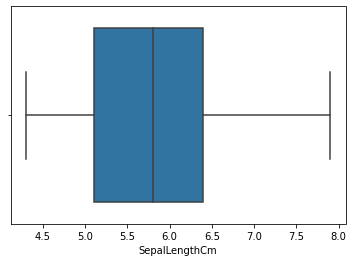

In [13]:
sns.boxplot(df['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

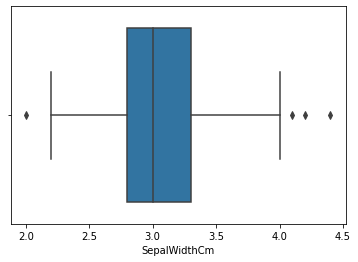

In [14]:
sns.boxplot(df['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

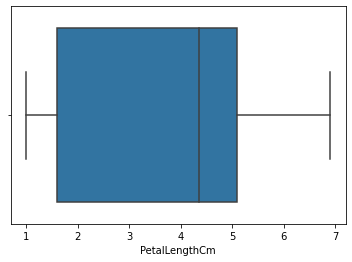

In [15]:
sns.boxplot(df['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

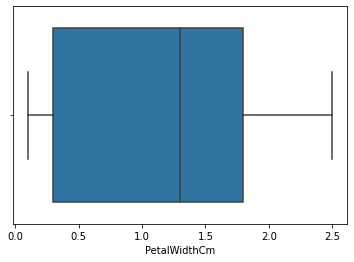

In [16]:
sns.boxplot(df['PetalWidthCm'])

### Outliers are present in only SepalWidthCm but they are not much away from normal data.

### Normalizing data

In [17]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [18]:
scaled_df

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00, -1.22474487e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00, -1.22474487e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.563

## Dendrogram

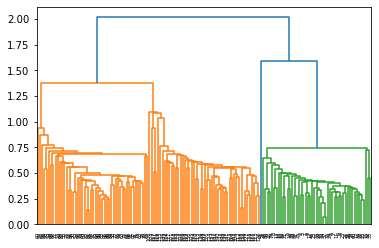

In [19]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='single'))

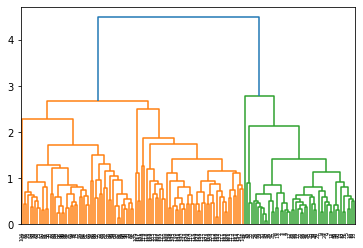

In [20]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='average'))

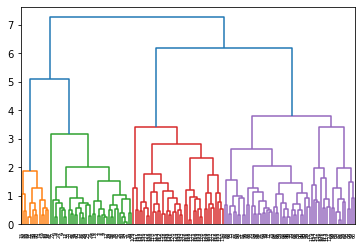

In [21]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='complete'))

## _Model Building_

### Agglomerative Clustering

In [23]:
# Create Clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [24]:
# Save clusters for chart
y_hc = hc.fit_predict(scaled_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [25]:
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
145,0
146,0
147,0
148,0


## _K-Means Clustering_

In [26]:
from sklearn.cluster import KMeans

In [27]:
wcss = []

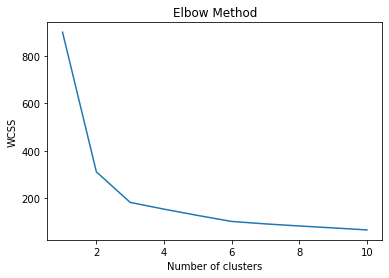

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### The elbow method shown in above figure gives optimum number of clusters.Optimum number of clusters can be considered where graph shows an elbow.

In [29]:
wcss

[900.0,
 311.2275610947795,
 182.24575057384158,
 153.78725601769804,
 127.19966572125591,
 101.90969999510386,
 91.63810490829067,
 82.76784548955962,
 74.66754721579429,
 66.17636345639364]

In [30]:
#Build Cluster algorithm
clusters_new = KMeans(3, max_iter=500, algorithm='auto', random_state=42)
clusters_new.fit(scaled_df)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [31]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [33]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.16627346,  0.95975051, -0.1249576 ,  1.03879425,  1.11105616,
         1.22474487],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862,
        -1.22474487],
       [ 0.03375354,  0.08963316, -0.6945649 ,  0.29580373,  0.18126414,
         0.04710557]])

In [34]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,,mean,mean,mean,mean,mean,mean
0,0,126.000000,6.635417,3.000000,5.585417,2.043750,2.000000
1,1,25.500000,5.006000,3.418000,1.464000,0.244000,0.000000
2,2,76.961538,5.917308,2.753846,4.278846,1.336538,1.038462


In [35]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,0
146,147,6.3,2.5,5.0,1.9,2,0
147,148,6.5,3.0,5.2,2.0,2,0
148,149,6.2,3.4,5.4,2.3,2,0


In [36]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df)

In [37]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

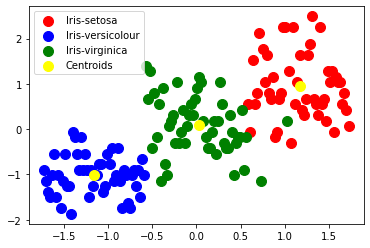

In [38]:
# Visualising the clusters - On the first two columns
plt.scatter(scaled_df[y_kmeans == 0, 0], scaled_df[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_df[y_kmeans == 1, 0], scaled_df[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_df[y_kmeans == 2, 0], scaled_df[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()